# Salary Linear Regression

In [3]:
import pandas as pd
import os

In [4]:
data = pd.read_csv("data/data1.txt", header=None, names=['YearsExperience', 'Salary'])
data.head(10)


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39895
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


# Data  info 

In [5]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null int64
dtypes: float64(1), int64(1)
memory usage: 560.0 bytes


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,75989.433333
std,2.837888,27423.991678
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.250000
max,10.500000,122391.000000


In [6]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

# Data Visualization

In [7]:
import matplotlib.pyplot as plt

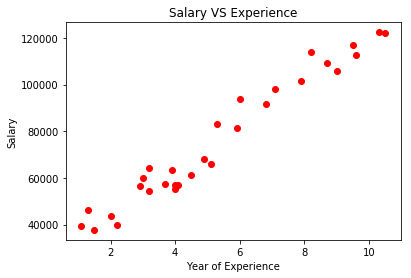

In [8]:
plt.scatter(data["YearsExperience"], data["Salary"], color='red')
plt.title('Salary VS Experience')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

In [9]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,YearsExperience,Salary
YearsExperience,1,0.98
Salary,0.98,1


# Feature selection

In [10]:
data1=data[["YearsExperience","Salary"]]

In [11]:
import numpy as np 
from sklearn.model_selection import train_test_split

x=data1["YearsExperience"].values[:,np.newaxis]
y=data1["Salary"]
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=1/3, random_state=30)

# Model training

In [12]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

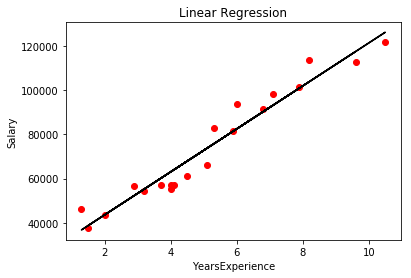

In [17]:
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train, color='red')
plt.title("Linear Regression")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.plot(x_train,LR_model.predict(x_train),color="black")
plt.show()

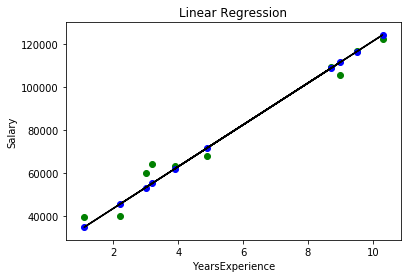

In [13]:
plt.scatter(x_test,y_test, color='green')
plt.scatter(x_test,LR_model.predict(x_test),color="blue")
plt.title("Linear Regression")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.plot(x_test,LR_model.predict(x_test),color="black")
plt.show()

# Evaluation

In [16]:
from sklearn import metrics 
LR_predicted = LR_model.predict(x_test)
print(LR_predicted)
print("LR MSE = " ,metrics.mean_squared_error(y_test, LR_predicted))
print("LR R squared = " ,metrics.r2_score(y_test, LR_predicted))

[ 71791.78247514 124339.90616885 116554.99895497  62060.64845779
 108770.09174109  34813.4732092   55248.85464564  53302.62784217
 111689.43194629  45517.72062829]
LR MSE =  24147808.282344572
LR R squared =  0.9731596650617627
